#Gradient Decent für eine lineare Regression ohne Library

In [64]:
import random

# Datenpunkte => y = 5x + 2
X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [7, 12, 17, 22, 27, 32, 37, 42, 47 ]
y = [7, 12, 17, 22, 27, 32, 37, 42, 47 ]
n = len(X) # Anzahl Datenpunkte

# Hyperparameter
learning_rate = 0.01  # Lerningrate
epochs = 10000 # Anzahl Epochen

# Zufällige Initialisierung von w und b
w = random.random()
b = random.random()

# Forward pass
def forward(X):
    return [w * x_i + b for x_i in X]

# loss = MSE
def loss(y, y_pred):
    return sum((y[i] - y_pred[i]) ** 2 for i in range(n)) / n

# Backward pass (Gradienten berechnen) => Ableitung des Loss (MSE) nach w und b
def backward(X, y, y_pred):
    gradient_w = (-2 / n) * sum(X[i] * (y[i] - y_pred[i]) for i in range(n))  # d_loss/d_w
    gradient_b = (-2 / n) * sum(y[i] - y_pred[i] for i in range(n)) # d_loss/d_b
    return gradient_w, gradient_b

In [65]:
# Training
for epoch in range(1, epochs+1):

    # Forward Pass
    y_pred = forward(X)

    # Berechnung des Fehlers (MSE)
    l = loss(y, y_pred)
    if epoch % 1000 == 0:
      print(f'Loss after {epoch} iterations: {l}')

    # # Backward pass
    gradient_w, gradient_b = backward(X, y, y_pred)

    # Aktualisiere w und b
    w -= learning_rate * gradient_w
    b -= learning_rate * gradient_b

# Ergebnis
print("Optimales w:", w)
print("Optimales b:", b)

Loss after 1000 iterations: 6.181704639263159e-05
Loss after 2000 iterations: 1.644637491846316e-08
Loss after 3000 iterations: 4.375544670416831e-12
Loss after 4000 iterations: 1.1641100840646534e-15
Loss after 5000 iterations: 3.09710811983894e-19
Loss after 6000 iterations: 8.239262221088018e-23
Loss after 7000 iterations: 2.213894304896924e-26
Loss after 8000 iterations: 3.3307460442664943e-28
Loss after 9000 iterations: 3.3307460442664943e-28
Loss after 10000 iterations: 3.3307460442664943e-28
Optimales w: 5.000000000000007
Optimales b: 1.9999999999999594


In [66]:
# Vorhersage
x_test = 20
prediction = w * x_test + b
print("\nVorhersage für x =", x_test, ":", prediction)


Vorhersage für x = 20 : 102.0000000000001


#Gradient Decent für eine lineare Regression mit Pytorch

In [67]:
import torch

# Datenpunkte
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float32)
y = torch.tensor([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype=torch.float32)

# Zufällige Initialisierung von w und b
w = torch.rand(1, dtype=torch.float32, requires_grad=True)
b = torch.rand(1, dtype=torch.float32, requires_grad=True)

# Hyperparameter
learning_rate = 0.01  # Lerningrate
epochs = 10000 # Anzahl Epochen

# Forward pass
def forward(x):
    return w * x + b

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

In [68]:
# Training
for epoch in range(1, epochs+1):

    # Forward pass
    y_pred = forward(X)

    #  Berechnung des Fehlers (MSE)
    l = loss(y, y_pred)
    if epoch % 1000 == 0:
      print(f'Loss after {epoch} iterations: {l}')

    # Backward pass (Gradienten berechnen) => Ableitung von MSE nach w und b
    l.backward()

    # Aktualisiere w und b
    with torch.no_grad():
      w -= learning_rate * w.grad
      b -= learning_rate * b.grad

    # Gradienten nach Aktualisierung wieder auf 0 setzen
    w.grad.zero_()

# Ergebnis
print("Optimales w:", w[0].item())
print("Optimales b:", b[0].item())

Loss after 1000 iterations: 2.5637644784914926e-10
Loss after 2000 iterations: 2.0210993523315374e-13
Loss after 3000 iterations: 2.0210993523315374e-13
Loss after 4000 iterations: 1.2631871460291877e-13
Loss after 5000 iterations: 2.5263741904144217e-14
Loss after 6000 iterations: 1.4147695601846033e-12
Loss after 7000 iterations: 2.0210993523315374e-13
Loss after 8000 iterations: 2.0210993523315374e-13
Loss after 9000 iterations: 1.4147695601846033e-12
Loss after 10000 iterations: 2.5263741904144217e-14
Optimales w: 5.0
Optimales b: 1.999999761581421


In [69]:
# Vorhersage
x_test = 20
prediction = w * x_test + b
print("\nVorhersage für x =", x_test, ":", prediction[0].item())


Vorhersage für x = 20 : 102.0


#Lineare Regresson mit neuronales Netzwerk mit Pytorch

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

# Datenpunkte
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float32).unsqueeze(1)
y = torch.tensor([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype=torch.float32).unsqueeze(1)

# Modell erstellen
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Einfaches lineares Modell (1 Eingabe, 1 Ausgabe)

    def forward(self, x):
        return self.linear(x)

# Modell instanziieren
model = LinearRegressionModel()

# Verlustfunktion und Optimierer einrichten
criterion = nn.MSELoss()  # Mean Squared Error als Verlustfunktion
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastischer Gradientenabstieg als Optimierer

In [71]:
print(model.linear.weight.shape)
print(model.linear.weight.item())
print(model.linear.bias.shape)
print(model.linear.bias.item())

torch.Size([1, 1])
-0.42602241039276123
torch.Size([1])
0.6538351774215698


In [72]:
# Training
epochs = 10000
losses = []

for epoch in range(1, epochs+1):

    # Forward pass
    outputs = model(X)

    # Verlust berechnen
    loss = criterion(outputs, y)

    # Gradienten zurücksetzen
    optimizer.zero_grad()

    # Backward pass => Ableitungen berchnen
    loss.backward()

    # Optimizer Schritt ausführen => Gewichte aktualisieren
    optimizer.step()

    # Loss anzeigen
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Parameter ausgeben
print("Lernte Gewicht m:", model.linear.weight.item())
print("Gelernter Bias b:", model.linear.bias.item())


Epoch 1000, Loss: 1.2578773748828098e-05
Epoch 2000, Loss: 3.377787605174376e-09
Epoch 3000, Loss: 9.600222006245218e-11
Epoch 4000, Loss: 9.600222006245218e-11
Epoch 5000, Loss: 9.600222006245218e-11
Epoch 6000, Loss: 9.600222006245218e-11
Epoch 7000, Loss: 9.600222006245218e-11
Epoch 8000, Loss: 9.600222006245218e-11
Epoch 9000, Loss: 9.600222006245218e-11
Epoch 10000, Loss: 9.600222006245218e-11
Lernte Gewicht m: 5.000003814697266
Gelernter Bias b: 1.9999781847000122


In [73]:
print(model.linear.weight.shape)
print(model.linear.weight.item())
print(model.linear.bias.shape)
print(model.linear.bias.item())
print(list(model.parameters()))

torch.Size([1, 1])
5.000003814697266
torch.Size([1])
1.9999781847000122
[Parameter containing:
tensor([[5.0000]], requires_grad=True), Parameter containing:
tensor([2.0000], requires_grad=True)]


In [74]:
# Vorhersage
x_test = 20
prediction = w * x_test + b
print("\nVorhersage für x =", x_test, ":", prediction[0].item())


Vorhersage für x = 20 : 102.0


#Lineare Regression mit Sklearn

Steigung (w): 5.000000000000001
Y-Achsenabschnitt (b): 1.9999999999999964


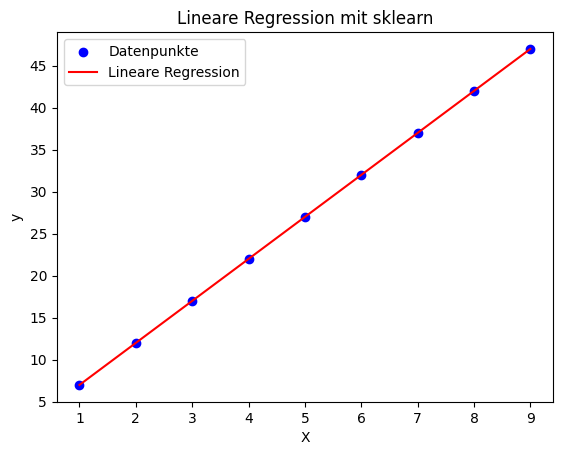

In [75]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor # LinearRegression (analytische Lösung)

# Datenpunkte
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)  # scikit-learn erwartet 2D-Arrays
y = np.array([7, 12, 17, 22, 27, 32, 37, 42, 47])

# Lineare Regression mit sklearn
model = LinearRegression()
model.fit(X, y)  # Training des Modells

# Vorhersagen erstellen
y_pred = model.predict(X)

# Modellparameter
w = model.coef_[0]  # Gewicht (Steigung)
b = model.intercept_  # Bias (y-Achsenabschnitt)

print(f"Steigung (w): {w}")
print(f"Y-Achsenabschnitt (b): {b}")

# Visualisierung der Ergebnisse
plt.scatter(X, y, color="blue", label="Datenpunkte")  # Originaldatenpunkte
plt.plot(X, y_pred, color="red", label="Lineare Regression")  # Regressionslinie
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Lineare Regression mit sklearn")
plt.show()